In [84]:
include("OutputHandling.jl")
include("ConcentrationClassification.jl")

LoadError: LoadError: syntax: unexpected "end"
in expression starting at /Users/ezragreenberg/Julia/ExperimentalFullModelWork/OutputHandling.jl:288

Move to directory where I stored all the csv files and upload the data

In [19]:
cd("/Users/ezragreenberg/ClassifierFinalResultsCSVs/NoNegRun")
mydf = getAllCSVs()

Row,A,K,L,P,amp,df,fit,ka1,ka4,ka7,kb1,oscFound,per
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.001,0.001,6.30957,0.001,0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.001,0.001,6.30957,0.00316228,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.001,0.001,6.30957,0.01,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.00316228,0.001,6.30957,0.001,0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.00316228,0.001,6.30957,0.00316228,0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.00316228,0.001,6.30957,0.01,0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.00316228,0.001,6.30957,0.0316228,0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.01,0.001,6.30957,0.001,0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.01,0.001,6.30957,0.00316228,0,0.0


Remove places with empty rows, ka7 that is too low, or improper ka1 to kb1 ratios

In [20]:
cleandf = unique(removeBadValues(mydf))

Row,A,K,L,P,amp,df,fit,ka1,ka4,ka7,kb1,oscFound,per
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.001,0.001,6.30957,0.001,0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.001,0.001,6.30957,0.00316228,0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.001,0.001,6.30957,0.01,0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.00316228,0.001,6.30957,0.001,0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.00316228,0.001,6.30957,0.00316228,0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.00316228,0.001,6.30957,0.01,0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.00316228,0.001,6.30957,0.0316228,0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.01,0.001,6.30957,0.001,0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.1,2.0,0.01,0.001,6.30957,0.00316228,0,0.0


Now let's just get the oscillatory values

In [21]:
osc_values = getOscValues(cleandf)

Row,A,K,L,P,amp,df,fit,ka1,ka4,ka7,kb1,oscFound,per
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,3.16228,3.16228,10.0,0.1,0.265087,10000.0,-100.0,0.1,0.00316228,6.30957,0.316228,3,10.9571
2,3.16228,3.16228,10.0,0.1,0.270567,10000.0,-100.0,0.1,0.00316228,2.51189,0.316228,3,10.9714
3,3.16228,3.16228,10.0,0.1,0.26719,10000.0,-100.0,0.1,0.00316228,3.98107,0.316228,3,10.9571


For the values above, at least 3 oscillatory solutions were found. Below we have points where at least 1 was found

In [24]:
maybeOscValues = getOscValues(cleandf; minOscSols=1)
CSV.write("/Users/ezragreenberg/Julia/ExperimentalFullModelWork/maybeOscValues.csv",maybeOscValues)

"/Users/ezragreenberg/Julia/ExperimentalFullModelWork/maybeOscValues.csv"

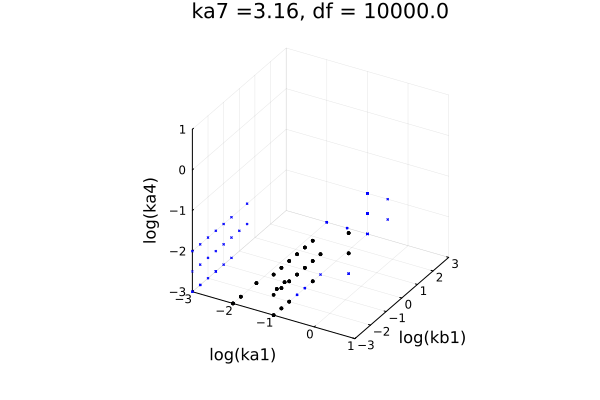

In [25]:
PlotNoka7WithShadow(maybeOscValues, "ka7 =3.16, df = 10000.0")

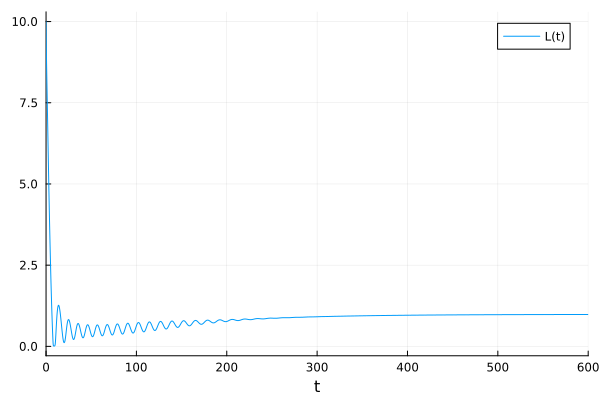

In [8]:
Plots.plot(entryToSol(osc_values, 1,tspan=longSpan))

In [26]:
describe(cleandf)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,A,0.000418291,0.0,0.0,3.16228,0,Float64
2,K,0.000418291,0.0,0.0,3.16228,0,Float64
3,L,0.00132275,0.0,0.0,10.0,0,Float64
4,P,1.32275e-5,0.0,0.0,0.1,0,Float64
5,amp,3.53988e-5,0.0,0.0,0.270567,0,Float64
6,df,1462.44,0.1,65.8114,10000.0,0,Float64
7,fit,2.05882,-100.0,2.0,4.0,0,Float64
8,ka1,2.44616,0.001,0.316228,10.0,0,Float64
9,ka4,1.62492,0.001,0.1,10.0,0,Float64


In [10]:
describe(maybeOscValues)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,A,0.102009,0.0,0.0,3.16228,0,Float64
2,K,0.102009,0.0,0.0,3.16228,0,Float64
3,L,0.322581,0.0,0.0,10.0,0,Float64
4,P,0.00322581,0.0,0.0,0.1,0,Float64
5,amp,0.00863273,0.0,0.0,0.270567,0,Float64
6,df,10000.0,10000.0,10000.0,10000.0,0,Float64
7,fit,-1.29032,-100.0,2.0,2.0,0,Float64
8,ka1,0.101105,0.01,0.1,0.316228,0,Float64
9,ka4,0.00440719,0.001,0.00316228,0.01,0,Float64


For the three oscillatory solutions we found, we much more finely explore the concentration space

In [19]:
concdfArr = Vector{DataFrame}(undef, 3)
for i in 1:3
    concdfArr[i] = classifyConcentrations(getP(osc_values, i), getu0Ranges(); filename="$(i)ConcOutput")
end 

In [28]:
concdfArr = Vector{DataFrame}(undef, 3)
concdfArr[1] = DataFrame(CSV.File("/Users/ezragreenberg/ClassifierFinalResultsCSVs/1ConcOutput/1ConcOutput/1ConcOutput.csv"))
concdfArr[2] = DataFrame(CSV.File("/Users/ezragreenberg/ClassifierFinalResultsCSVs/1ConcOutput/1ConcOutput/2ConcOutput/2ConcOutput.csv"))
concdfArr[3] = DataFrame(CSV.File("/Users/ezragreenberg/ClassifierFinalResultsCSVs/1ConcOutput/1ConcOutput/2ConcOutput/3ConcOutput/3ConcOutput.csv"))

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.01,0.001,0.01,0.001,0.0,0.0,2.0
2,0.0158489,0.001,0.01,0.001,0.0,0.0,2.0
3,0.0251189,0.001,0.01,0.001,0.0,0.0,2.0
4,0.0398107,0.001,0.01,0.001,0.0,0.0,2.0
5,0.0630957,0.001,0.01,0.001,0.0,0.0,2.0
6,0.1,0.001,0.01,0.001,0.0,0.0,2.0
7,0.158489,0.001,0.01,0.001,0.0,0.0,2.0
8,0.251189,0.001,0.01,0.001,0.0,0.0,2.0
9,0.398107,0.001,0.01,0.001,0.0,0.0,2.0


In [101]:
oscbool = concdfArr[1][:, :retcode] .< 0
osc1 = concdfArr[1][oscbool, :]

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.251189,0.251189,2.51189,0.01,0.0942892,31.8438,-600.0
2,0.398107,0.398107,2.51189,0.0158489,0.122547,25.1045,-600.0
3,0.398107,0.630957,2.51189,0.0251189,0.0394672,17.5323,-600.0
4,0.158489,0.251189,3.98107,0.00630957,0.0542271,29.9176,-600.0
5,0.251189,0.398107,3.98107,0.01,0.0822921,23.0957,-600.0
6,0.398107,0.630957,3.98107,0.0158489,0.0866973,18.0645,-600.0
7,0.630957,1.0,3.98107,0.0251189,0.0698871,14.2525,-600.0
8,0.630957,1.0,6.30957,0.0251189,0.0998682,15.127,-600.0
9,1.0,1.58489,6.30957,0.0398107,0.106109,11.7143,-600.0


In [43]:
describe(osc1)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,A,0.5702,0.158489,0.398107,1.58489,0,Float64
2,K,0.773029,0.251189,0.630957,1.58489,0,Float64
3,L,4.23887,2.51189,3.98107,6.30957,0,Float64
4,P,0.0212985,0.00630957,0.0204839,0.0398107,0,Float64
5,amp,0.107894,0.0394672,0.0904933,0.323558,0,Float64
6,per,20.3184,11.7143,17.7984,31.8438,0,Float64
7,retcode,-600.0,-600.0,-600.0,-600.0,0,Float64


In [30]:
function getU0(mydf, row)
    u0 = zeros(16)
    u0[1] = mydf[row, :L]
    u0[2] = mydf[row, :K]
    u0[3] = mydf[row, :P]
    u0[4] = mydf[row, :A]
    return u0
end

getU0 (generic function with 1 method)

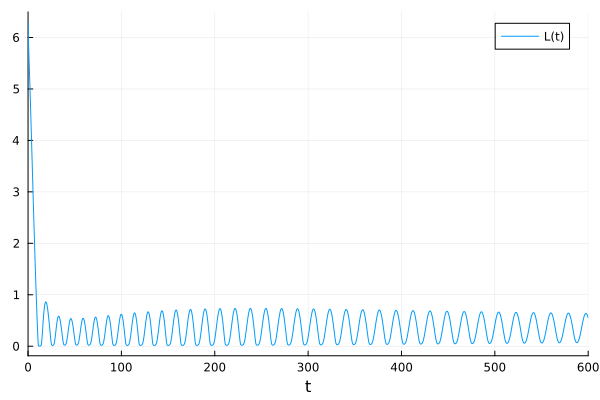

In [38]:
p=[0.1, 0.31622776601683794, 1.183772233983162, 0.0007, 0.002, 0.118, 0.0609, 0.0031622776601683794, 0.091706052144883, 6.309573444801933, 160.7733643472754, 85.3, 10000.0]
u0=getU0(osc1, 10)
sol = solve(remake(prob, u0=u0, tspan=(0.0, 600), p=p), Rodas4(), abstol=1e-9, reltol=1e-12, saveat=0.1, save_idxs=1, maxiters = 150.0*600.0, verbose=false)
plot(sol)

In [39]:
oscbool = concdfArr[2][:, :retcode] .< 0
osc2 = concdfArr[2][oscbool, :]

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.251189,0.251189,2.51189,0.01,0.0951607,31.8625,-600.0
2,0.251189,0.398107,2.51189,0.0158489,0.0251578,22.6708,-600.0
3,0.398107,0.398107,2.51189,0.0158489,0.123316,25.1318,-600.0
4,0.398107,0.630957,2.51189,0.0251189,0.0404519,17.5484,-600.0
5,0.158489,0.251189,3.98107,0.00630957,0.0547681,29.9294,-600.0
6,0.251189,0.398107,3.98107,0.01,0.0827355,23.113,-600.0
7,0.398107,0.630957,3.98107,0.0158489,0.0872124,18.0871,-600.0
8,0.630957,1.0,3.98107,0.0251189,0.0705664,14.2725,-600.0
9,0.630957,1.0,6.30957,0.0251189,0.102062,15.1514,-600.0


In [33]:
p2 = [0.1, 0.31622776601683794, 1.183772233983162, 0.0007, 0.002, 0.118, 0.0609, 0.0031622776601683794, 0.091706052144883, 2.51188643150958, 12.663570828873631, 85.3, 10000.0]

13-element Vector{Float64}:
     0.1
     0.31622776601683794
     1.183772233983162
     0.0007
     0.002
     0.118
     0.0609
     0.0031622776601683794
     0.091706052144883
     2.51188643150958
    12.663570828873631
    85.3
 10000.0

In [41]:
oscbool = concdfArr[3][:, :retcode] .< 0
osc3 = concdfArr[3][oscbool, :]

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.251189,0.251189,2.51189,0.01,0.0946277,31.85,-600.0
2,0.398107,0.398107,2.51189,0.0158489,0.122845,25.1136,-600.0
3,0.398107,0.630957,2.51189,0.0251189,0.0398499,17.5387,-600.0
4,0.158489,0.251189,3.98107,0.00630957,0.054437,29.9235,-600.0
5,0.251189,0.398107,3.98107,0.01,0.0824639,23.1043,-600.0
6,0.398107,0.630957,3.98107,0.0158489,0.0868965,18.0742,-600.0
7,0.630957,1.0,3.98107,0.0251189,0.0701501,14.26,-600.0
8,0.630957,1.0,6.30957,0.0251189,0.100724,15.1378,-600.0
9,1.0,1.58489,6.30957,0.0398107,0.106816,11.7224,-600.0


In [35]:
p3 = [0.1, 0.31622776601683794, 1.183772233983162, 0.0007, 0.002, 0.118, 0.0609, 0.0031622776601683794, 0.091706052144883, 3.9810717055349722, 69.96179651586392, 85.3, 10000.0]

13-element Vector{Float64}:
     0.1
     0.31622776601683794
     1.183772233983162
     0.0007
     0.002
     0.118
     0.0609
     0.0031622776601683794
     0.091706052144883
     3.9810717055349722
    69.96179651586392
    85.3
 10000.0

The parameter values above are calculated from experimental values and osc_values for the unknowns.

In [76]:
describe(concdfArr[1])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,A,12.9026,0.01,1.0,100.0,0,Float64
2,K,1.29026,0.001,0.1,10.0,0,Float64
3,L,12.9026,0.01,1.0,100.0,0,Float64
4,P,10.4219,0.001,0.324648,100.0,0,Float64
5,amp,4.48092e-6,0.0,0.0,0.323558,0,Float64
6,per,0.000843835,0.0,0.0,31.8438,0,Float64
7,retcode,2.23682,-600.0,2.0,4.0,0,Float64


In [73]:
osc1

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.251189,0.251189,2.51189,0.01,0.0942892,31.8438,-600.0
2,0.398107,0.398107,2.51189,0.0158489,0.122547,25.1045,-600.0
3,0.398107,0.630957,2.51189,0.0251189,0.0394672,17.5323,-600.0
4,0.158489,0.251189,3.98107,0.00630957,0.0542271,29.9176,-600.0
5,0.251189,0.398107,3.98107,0.01,0.0822921,23.0957,-600.0
6,0.398107,0.630957,3.98107,0.0158489,0.0866973,18.0645,-600.0
7,0.630957,1.0,3.98107,0.0251189,0.0698871,14.2525,-600.0
8,0.630957,1.0,6.30957,0.0251189,0.0998682,15.127,-600.0
9,1.0,1.58489,6.30957,0.0398107,0.106109,11.7143,-600.0


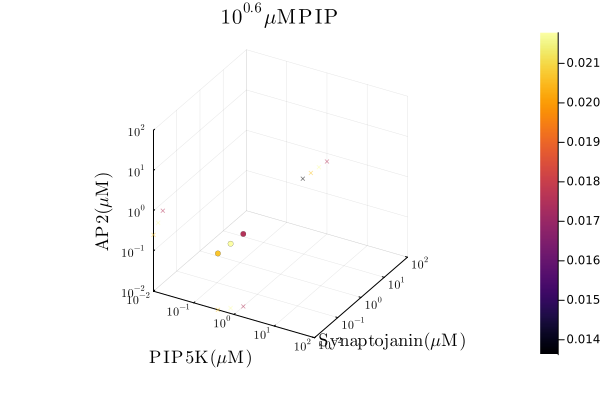

┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots /Users/ezragreenberg/.julia/packages/Plots/QWCV6/src/backends/gr.jl:528
┌ Warning: Multiple series with different fill alpha share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots /Users/ezragreenberg/.julia/packages/Plots/QWCV6/src/backends/gr.jl:528
┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots /Users/ezragreenberg/.julia/packages/Plots/QWCV6/src/backends/gr.jl:528
┌ Warning: Multiple series with different fill alpha share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots /Users/ezragreenberg/.julia/packages/Plots/QWCV6/src/backends/gr.jl:528
┌ Warning: Multiple series with different color share a colorbar.
│ Colorbar may not reflect all series correctly.
└ @ Plots /Users/ezragreenberg/.julia/packages/Plots/QWCV6/src/backends/gr.jl:528
┌ War

In [89]:
make3DAmpGraph(osc1, osc1[5, :L])

In [102]:
osc1


Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.251189,0.251189,2.51189,0.01,0.0942892,31.8438,-600.0
2,0.398107,0.398107,2.51189,0.0158489,0.122547,25.1045,-600.0
3,0.398107,0.630957,2.51189,0.0251189,0.0394672,17.5323,-600.0
4,0.158489,0.251189,3.98107,0.00630957,0.0542271,29.9176,-600.0
5,0.251189,0.398107,3.98107,0.01,0.0822921,23.0957,-600.0
6,0.398107,0.630957,3.98107,0.0158489,0.0866973,18.0645,-600.0
7,0.630957,1.0,3.98107,0.0251189,0.0698871,14.2525,-600.0
8,0.630957,1.0,6.30957,0.0251189,0.0998682,15.127,-600.0
9,1.0,1.58489,6.30957,0.0398107,0.106109,11.7143,-600.0


In [99]:
osc2

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.251189,0.251189,2.51189,0.01,0.0951607,31.8625,-600.0
2,0.251189,0.398107,2.51189,0.0158489,0.0251578,22.6708,-600.0
3,0.398107,0.398107,2.51189,0.0158489,0.123316,25.1318,-600.0
4,0.398107,0.630957,2.51189,0.0251189,0.0404519,17.5484,-600.0
5,0.158489,0.251189,3.98107,0.00630957,0.0547681,29.9294,-600.0
6,0.251189,0.398107,3.98107,0.01,0.0827355,23.113,-600.0
7,0.398107,0.630957,3.98107,0.0158489,0.0872124,18.0871,-600.0
8,0.630957,1.0,3.98107,0.0251189,0.0705664,14.2725,-600.0
9,0.630957,1.0,6.30957,0.0251189,0.102062,15.1514,-600.0


In [100]:
osc3

Row,A,K,L,P,amp,per,retcode
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.251189,0.251189,2.51189,0.01,0.0946277,31.85,-600.0
2,0.398107,0.398107,2.51189,0.0158489,0.122845,25.1136,-600.0
3,0.398107,0.630957,2.51189,0.0251189,0.0398499,17.5387,-600.0
4,0.158489,0.251189,3.98107,0.00630957,0.054437,29.9235,-600.0
5,0.251189,0.398107,3.98107,0.01,0.0824639,23.1043,-600.0
6,0.398107,0.630957,3.98107,0.0158489,0.0868965,18.0742,-600.0
7,0.630957,1.0,3.98107,0.0251189,0.0701501,14.26,-600.0
8,0.630957,1.0,6.30957,0.0251189,0.100724,15.1378,-600.0
9,1.0,1.58489,6.30957,0.0398107,0.106816,11.7224,-600.0
